In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy, pylab

# Step 1: Scraping data for the top 50 solar flares shown on SpaceWeatherLive

## Step 1.2 Use requests to get (as in, HTTP GET) the URL

In [2]:
SpaceWeatherLivepage = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html') #Extracting Space Weather Live HTML via URL

## Step 1.3 Extract the text from the page

In [3]:
SpaceWeatherLivepageText = SpaceWeatherLivepage.content #Getting the content of the page
# print(SpaceWeatherLivepageText) # Commented out to save space for reader

## Step 1.4 Use BeautifulSoup to read and parse the data, either as html or lxml and 1.5 Use prettify() to view the content and find the appropriate table

In [4]:
soup = BeautifulSoup(SpaceWeatherLivepageText, 'html.parser') #Parsing the page text as HTML for beautiful soup
# print(soup.prettify()) # Commented out to save space for reader

## Step 1.6 Use find to save the table as a variable

In [5]:
table = soup.find("table") #Finding the table (there is only 1) on the page
# print(table) # Commented out to save space for reader

## Step 1.7 Use pandas to read in the HTML file. HINT make-sure the above data is properly typecast, if necessary and Step 1.8 Set reasonable names for the table columns, e.g., rank, x_classification, date, region, start_time, maximum_time, end_time, movie. 

In [6]:
pdTables = pd.read_html(SpaceWeatherLivepageText, flavor = 'bs4') #Read the table from the html
spaceWeatherdf = pdTables[0] #Store the table

In [7]:
spaceWeatherdf = spaceWeatherdf.rename(columns={"Unnamed: 0": "Rank", "Unnamed: 1": "X_classification", "Unnamed: 2": "Date", "Unnamed: 7": "Movie"}, errors="raise") #Properly name the columns
#and set proper datatypes (all str)
spaceWeatherdf['Region'] = spaceWeatherdf['Region'].apply(str)
spaceWeatherdf['Rank'] = spaceWeatherdf['Rank'].apply(str)
spaceWeatherdf['X_classification'] = spaceWeatherdf['X_classification'].apply(str)
spaceWeatherdf['Start'] = spaceWeatherdf['Start'].apply(str)
spaceWeatherdf['Date'] = spaceWeatherdf['Date'].apply(str)
spaceWeatherdf['Maximum'] = spaceWeatherdf['Maximum'].apply(str)
spaceWeatherdf['End'] = spaceWeatherdf['End'].apply(str)
spaceWeatherdf

,Rank,X_classification,Date,Region,Start,Maximum,End,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


## Step 1 description

Including the comments left within the code, the overall goal of step 1 was to extract the table from SpaceWeatherLive.com and ensure that all column names were properly labeled and all data was extracted. This was done using pd.read_html and df.rename respectively. 

# Step 2: Tidy the top 50 solar flare data using pandas

## Step 2.1 Drop the last column of the table, since we are not going to use it moving forward.

In [8]:
spaceWeatherdf = spaceWeatherdf.drop(['Movie'], axis = 1)
spaceWeatherdf

,Rank,X_classification,Date,Region,Start,Maximum,End
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


## Step 2.2 Use datetime import to combine the date and each of the three time columns into three datetime columns, Step 2.3 Update the values in the dataframe, and Step 2.4 Mark regions coded as - as missing

In [9]:
for index, row in spaceWeatherdf.iterrows():
    #Update the values of the start, maximum, and end columns to be in the datetime format. I used datetime.strptime function for this
    #Also, the set_value suggested in the documentation is depricated
    spaceWeatherdf.at[index, 'Start'] = datetime.strptime(row['Date'] + " " + row['Start'], '%Y/%m/%d %H:%M')
    spaceWeatherdf.at[index, 'Maximum'] = datetime.strptime(row['Date'] + " " + row['Maximum'], '%Y/%m/%d %H:%M')
    spaceWeatherdf.at[index, 'End'] = datetime.strptime(row['Date'] + " " + row['End'], '%Y/%m/%d %H:%M')
    
    #Check for any missing values in the region column and update them to be 'missing data'
    spaceWeatherdf = spaceWeatherdf.replace('-', np.nan)
    
    #Fix decimals so that Part 2.2 works properly when matching by classification
    if (len(row['X_classification']) == 2):
        spaceWeatherdf.at[index, 'X_classification'] = row['X_classification'] + ".0"
    elif ('+' in row['X_classification']):
        spaceWeatherdf.at[index, 'X_classification'] = row['X_classification'][:-1] + "."
        
    #Fix region inaccuracy, 0486 is actually 10486 and so forth with any regions that start with 0
    if (len(row['Region']) == 3):
        spaceWeatherdf.at[index, 'Region'] = "10" + row['Region']
    elif (len(row['Region']) == 2):
        spaceWeatherdf.at[index, 'Region'] = "100" + row['Region']

#Dropping the date column and renaming start, maximum, and end to be Datetime columns. Also moved region to end to match documentation
spaceWeatherdf = spaceWeatherdf.drop(['Date'], axis = 1)
spaceWeatherdf = spaceWeatherdf.rename(columns={"Start": "Start_Datetime", "Maximum": "Maximum_Datetime", "End": "End_Datetime"}, errors="raise")
spaceWeatherdf = spaceWeatherdf[['Rank', 'X_classification', 'Start_Datetime', 'Maximum_Datetime', 'End_Datetime', 'Region']]
spaceWeatherdf['Start_Datetime'] = pd.to_datetime(spaceWeatherdf['Start_Datetime'])
spaceWeatherdf['Maximum_Datetime'] = pd.to_datetime(spaceWeatherdf['Maximum_Datetime'])
spaceWeatherdf['End_Datetime'] = pd.to_datetime(spaceWeatherdf['End_Datetime'])
spaceWeatherdf

,Rank,X_classification,Start_Datetime,Maximum_Datetime,End_Datetime,Region
0,1,X28.,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,10486
1,2,X20.,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2.,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,10486
3,4,X17.,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,10808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,10486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,10930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,10486


## Step 2 description

Including the comments left within the code, the overall goal of step 2 was to tidy up the table from SpaceWeatherLive.com that was extracted in step 1 by dropping the movies column, fixing any missing values (NaN) using df.replace, converting all times to Datetimes to drop the date column, and finally cleaning up the decimal values with + signs to match the NASA table used in Step 3. rename is used once again to properly name the new datetime columns from their original "x_time" format. 

**A big part of this step was also discovering that the data had a region inaccuracy with regions with more than 4 characters (such as 10486) which was originally written as 0486.** This was fixed by adding 10 or 100 behind the numbers depending on their length.

# Step 3: Scrape the NASA data

## Step 3.1 Use BeautifulSoup functions (e.g., find, findAll) and string functions (e.g., split and built-in slicing capabilities) to obtain each row of data as a long string and Step 3.2 Use string::split and list comprehensions or similar to separate each line of text into a data row. Choose appropriate names for columns.

In [10]:
NASApage = requests.get('https://www.hcbravo.org/IntroDataSci/misc/waves_type2.html') #Extracting NASA page HTML
NASApageText = NASApage.content #Getting the content from the page
# print(NASApageText) # Commented out to save space for reader

In [11]:
#Prettify the page to determine the structure
NASASoup = BeautifulSoup(NASApageText, 'html.parser')
# print(NASASoup.prettify()) # Commented out to save space for reader

### It can be seen here that the tables of NASAs website are not formatted as a table but rather a bunch of text and links within a \<pre> tag and the width is fixed. The pattern is that there are 14 elements in each row seperated by space ' ' excluding the plots

In [12]:
preText = NASASoup.find('pre').text
results = []

for line in preText.split('\n')[1:-1]:
    results.append(line)

NASAdf = pd.DataFrame(results)
NASAdf = NASAdf.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 494, 493]) #Drop first 10 rows and last 2; unnecessary rows before and after data
NASAdf.columns = ['rows'] #Assigning a column name (I could not figure out the default column name)

#Split by whitespace and add appropriate number of columns w/ names
NASAdf = NASAdf['rows'].str.split(" +",expand = True) #Split by space
cols = [14,15,16,17,18,19,20,21,22,23] #marking the columns for deletion
NASAdf = NASAdf.drop(NASAdf.columns[cols], axis=1) #Remove last 7 columns because they come from the explanations column

#Reset the indicies to start from 0 since some rows were deleted
NASAdf = NASAdf.reset_index(drop=True)
NASAdf.columns = ['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'Start_Frequency', 'End_Frequency', 'Flare_Location', 'Flare_Region', 'Flare_Classification', 'Cme_Date', 'Cme_Time', 'Cme_Angle', 'Cme_Width', 'Cme_Speed']
NASAdf


,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Date,Cme_Time,Cme_Angle,Cme_Width,Cme_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,-----,----,12/13,14:24,Halo,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


## Step 3 description

Including the comments left within the code, the overall goal of step 3 was to extract the table from NASAs solar flare data site. This proved especially challenging because the table was formatted as a pre tag, which is a tag with a set width in html. To extract the rows of the table, I used .split() to split on new line characters, which gave me a big chunk of the data but left some stray rows and columns that had unnecessary text for the table (such as the description and dividers '==='). I dropped these extra rows and columns in this step and then removed trailing whitespace between values (some values had more than one space ahead of them). Finally, I reset the index of the table to account for the dropped rows and properly labeled the table.

# Step 4: Tidy the NASA the table

In [13]:
NASAdf = NASAdf.assign(Is_Halo = 'False')
NASAdf = NASAdf.assign(Width_Lower_Bound = 'False')

for index, row in NASAdf.iterrows():
    #Step 4.1 Recode any missing entries as NaN.
    #The indicators of missing values are:
    # ----
    # -----
    # BACK
    # --/--
    # --:--
    # FILA
    # DSF
    # ???? 
    # altr
    # EP?
    # EP
    NASAdf = NASAdf.replace('----', np.nan) #For flare region and sometimes CME width and speed
    NASAdf = NASAdf.replace('-----', np.nan) #For flare classification
    NASAdf = NASAdf.replace('---', np.nan) #For flare width
    NASAdf = NASAdf.replace('BACK', np.nan) #For flare location
    NASAdf = NASAdf.replace('--/--', np.nan) #For Date
    NASAdf = NASAdf.replace('--:--', np.nan) #For Time
    NASAdf = NASAdf.replace('FILA', np.nan) #For Filament
    NASAdf = NASAdf.replace('DSF', np.nan) #For Disappearing Solar Filament
    NASAdf = NASAdf.replace('EP', np.nan) #Not explained
    NASAdf = NASAdf.replace('EP?', np.nan) #Not explained
    NASAdf = NASAdf.replace('DIM', np.nan) #Dimming
    NASAdf = NASAdf.replace('altr', np.nan) #Not explained
    NASAdf = NASAdf.replace('????', np.nan) #For Frequencies
    NASAdf = NASAdf.replace('360h', '360') #For width variation
    
    #Update the values of the any time columns to be in the datetime format.
    NASAdf.at[index, 'Start_Date'] = datetime.strptime(row['Start_Date'] + " " + row['Start_Time'], '%Y/%m/%d %H:%M')
    
    year = str(NASAdf.at[index, 'Start_Date'].year)
    
    #Fixing 24 hour time... I have no idea why NASA did this
    if (row['End_Time'] == "24:00"):
        row['Start_Date'] = "00:00"
        NASAdf.at[index, 'End_Time'] = "00:00"
        NASAdf.at[index, 'End_Date'] = datetime.strptime(year + "/" + row['End_Date'] + " 00:00", '%Y/%m/%d %H:%M')
    else:
        NASAdf.at[index, 'End_Date'] = datetime.strptime(year + "/" + row['End_Date'] + " " + row['End_Time'], '%Y/%m/%d %H:%M')
    
    if (row['Cme_Date'] != '--/--'):
        NASAdf.at[index, 'Cme_Date'] = datetime.strptime(year + "/" + row['Cme_Date'] + " " + row['Cme_Time'], '%Y/%m/%d %H:%M')
        
    if (row['Cme_Angle'] == 'Halo'):
        NASAdf.at[index, 'Is_Halo'] = 'True'
        NASAdf.at[index, 'Cme_Angle'] = np.nan
        
    if ('>' in row['Cme_Width']):
        NASAdf.at[index, 'Width_Lower_Bound'] = 'True'
        NASAdf.at[index, 'Cme_Width'] = row['Cme_Width'][1:]

#Dropping the times columns to make them Datetime columns.
NASAdf = NASAdf.drop(['Start_Time', 'End_Time', 'Cme_Time'], axis = 1)
NASAdf = NASAdf.rename(columns={"Start_Date": "Start_Datetime", "End_Date": "End_Datetime", "Cme_Date": "Cme_Datetime"}, errors="raise")
NASAdf['Start_Datetime']= pd.to_datetime(NASAdf['Start_Datetime'])
NASAdf['End_Datetime']= pd.to_datetime(NASAdf['End_Datetime'])
NASAdf['Cme_Datetime']= pd.to_datetime(NASAdf['Cme_Datetime'])
NASAdf['Flare_Region']= NASAdf['Flare_Region'].apply(str)
NASAdf = NASAdf.replace('nan', np.nan) #For regions
NASAdf

,Start_Datetime,End_Datetime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Datetime,Cme_Angle,Cme_Width,Cme_Speed,Is_Halo,Width_Lower_Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,NaN,NaN,2014-12-13 14:24:00,NaN,360,2222,True,False
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,False,False
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NaN,360,587,True,False
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NaN,360,1195,True,False


## Step 4 description

Including the comments left within the code, the overall goal of step 4 was to tidy up the NASA data gathered in step 3 by filling in missing values, of which there were a lot, half which were not explained in the description. I had to manually look through the data to find missing value codes and use .replace to convert them to NaN. I then converted all the times to be datetimes using the same methods used in step 2. The only time tidying up I had to do was converting 24:00 to 00:00 to match proper military time supported by Datetime. Lastly, I added Is_Halo and Width_Lower_Bound columns to indicate when a solar flare is a halo and if its width is indicated to be lower bound. As usual, I made sure the column names matched up and that columns had proper formats before displaying. 

# Part 2: Analysis

## Question 1: Replication
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events? 

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

### Answer
Since the top 50 solar flares are all classified as X and then a decimal number, it is trivial to sort the NASA table by classification in decending order and then taking the top 50 results to attempt to match the SpaceWeatherLive data. So the answer is yes.

### Solution

In [14]:
NASAdfTop50 = NASAdf.sort_values(by='Flare_Classification', ascending=False)
NASAdfTop50 = NASAdfTop50.iloc[:50]
NASAdfTop50 = NASAdfTop50.sort_values(by='Flare_Classification', ascending=False, key=lambda col: pd.to_numeric(col.str[1:]))
NASAdfTop50

,Start_Datetime,End_Datetime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Datetime,Cme_Angle,Cme_Width,Cme_Speed,Is_Halo,Width_Lower_Bound
242,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
234,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
235,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,True,False


### Explanation
As shown by the data, the top 50 solar flares from the NASA data share SOME resembelance to the SpaceWeatherLive.com data, however, they are not exactly the same. Some of the solar flares listed by SpaceWeatherLive.com are not in the NASA data and vice versa. The replication is very close though, save for a few missing classifications. 
|

## Question 2: Integration 
For each of the top 50 solar flares in the SpaceWeatherLive data, find the best matching row from the NASA data. Here, you have to decide for yourself how you determine what "best matching" means in this context (you will have to justify your approach!) Multiple flares may match to the same row from the NASA data, depending on your chosen method, you will be expected to notice this if it occurs.

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset. If more than one SpaceWeatherLive entry "best matches", choose one and explain how you chose.

### Solution

In [15]:
result = pd.merge(NASAdf, spaceWeatherdf, left_on=['Flare_Classification', 'Flare_Region'], right_on=['X_classification', 'Region'], how='inner')
#Append the rank to the NASA dataframe
NASAdfRanks = result
for i in range(5):
        del NASAdfRanks[NASAdfRanks.columns.values[-1]]
#Adjust column names for the merge
NASAdfRanks = NASAdfRanks.rename(columns={"Start_Datetime_x": "Start_Datetime", "End_Datetime_x": "End_Datetime"})
NASAdfRanks['Rank'] = NASAdfRanks['Rank'].apply(int)
NASAdfRanks.sort_values(by=['Rank']) #Prints the matching rows

,Start_Datetime,End_Datetime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Datetime,Cme_Angle,Cme_Width,Cme_Speed,Is_Halo,Width_Lower_Bound,Rank
15,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,1
4,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2
0,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,7
20,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,9
12,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,10
18,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,True,False,12
21,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,NaN,NaN,False,False,14
19,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,True,False,15
2,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674,True,False,17
5,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,X5.6,2001-04-06 19:30:00,NaN,360,1270,True,False,18


The results above show the matching rows between the two dataframes based on classification AND region, sorted by rank in the SpaceWeatherLive data

In [16]:
merged_NASAdf = NASAdf.merge(NASAdfRanks, how = 'left', on = ['Start_Datetime', 'End_Datetime', 'Start_Frequency', 'End_Frequency', 'Cme_Datetime', 'Cme_Angle', 'Cme_Speed', 'Cme_Width', 'Flare_Location', 'Flare_Region', 'Flare_Classification', 'Is_Halo', 'Width_Lower_Bound'])

merged_NASAdf

,Start_Datetime,End_Datetime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Datetime,Cme_Angle,Cme_Width,Cme_Speed,Is_Halo,Width_Lower_Bound,Rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,NaN,NaN,2014-12-13 14:24:00,NaN,360,2222,True,False,NaN
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,False,False,NaN
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NaN,360,587,True,False,NaN
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NaN,360,1195,True,False,NaN


and above is shown the merged NASA dataframe with the ranks. 

### Explanation
I obtained my results by matching based on BOTH region and classification. This first required me to clean up the data from SpaceWeatherLive.com because they had an inaccuracy in labeling regions that started with a 1. I believe this is because the column seems to be limited to 4 characters. I decided these were the best columns to match on because they have no duplicates I have to deal with. While they are not individually unique, they are unique together. I considered using datetimes, but NONE of the datetimes matched up well between the two dataframes. 

## Question 3: Analysis  
Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset. Here are some possibilities (you can do something else)

1. Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.

# Solution, plotting CME Speeds over time using PyPlot

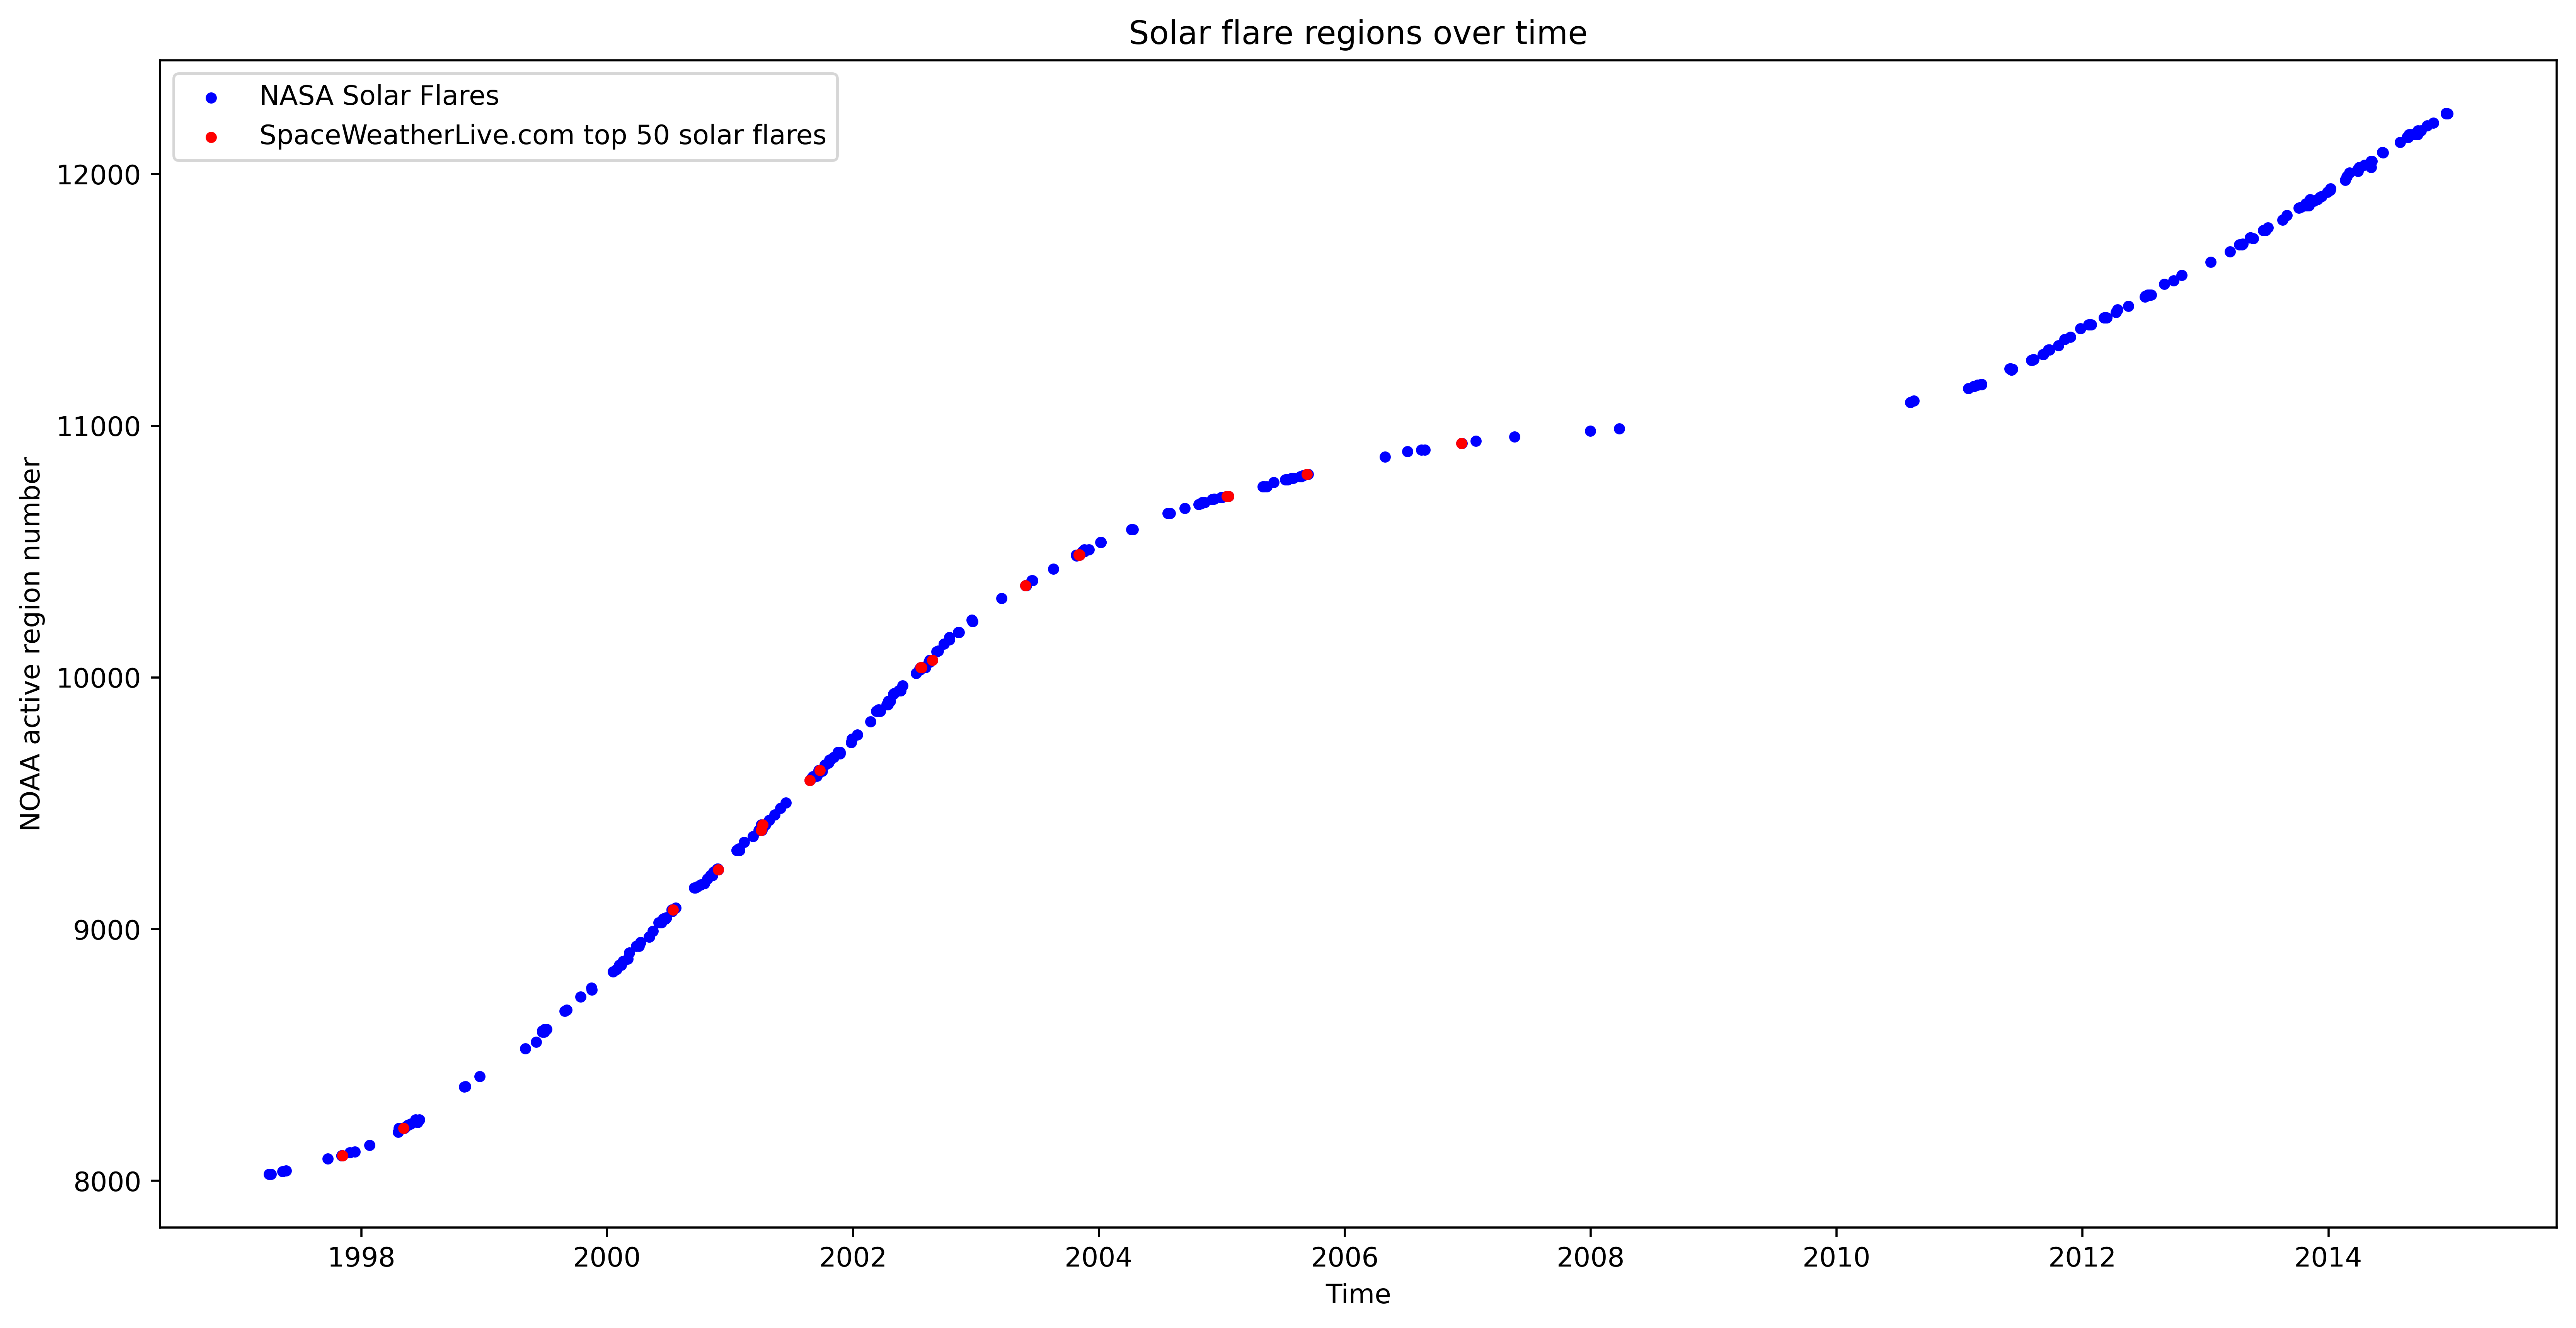

In [17]:
merged_NASAdf = merged_NASAdf.sort_values('Cme_Datetime', ascending=True)
NASAdfRanks = NASAdfRanks.sort_values('Cme_Datetime', ascending=True)
merged_NASAdf['Flare_Region'] = merged_NASAdf['Flare_Region'].apply(float)
NASAdfRanks['Flare_Region'] = NASAdfRanks['Flare_Region'].apply(float)
#Higher resolution so the graph is more readable
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 500
ax = pylab.subplot(111)
ax.scatter(merged_NASAdf['Cme_Datetime'], merged_NASAdf['Flare_Region'], s=10, c='b', label='NASA Solar Flares')
ax.scatter(NASAdfRanks['Cme_Datetime'], NASAdfRanks['Flare_Region'],  s=10, c='r', label='SpaceWeatherLive.com top 50 solar flares')
plt.title("Solar flare regions over time")
plt.xlabel("Time")
plt.ylabel("NOAA active region number")
plt.legend(loc='upper left');
ax.figure.show()

(a) a short description (2 sentences) of what the intent of your plot is

    The intention of this plot is to show that there is a correlation between solar flare regions and time; solar flare regions have been moving consistently for the past ~20 years. The plot has a very low variance and covariance, strengthening the correlation between the two variables. The plot also shows that powerful solar flares (from the top 50) occurred around the same regions (close together). 

(b) code to produce your plot 
    
    See above

(c) a short text description of your plot

    The plot above shows the NOAA active region number of solar flares over time. Points in blue indicate solar flares listed on http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html while points in orange/red incidcate top 50 solar flares listed on SpaceWeatherLive.com that matched data on the NASA page.

(d) a sentence or two of interpretation of your plot (again think of variation, co-variation, etc.).

    Once again, the graph has a lot of variance since active regions are very rarely the same for any two solar flares. The covariance, on the other hand, is very low between regions and time because the two variables are dependent (time has a large effect on CME regions), which is what the graph intended to show. The sun is an active reaction and therefore, activity is always moving around it, so it makes sense that regions are moving over time instead of being still. 